# Medidas de posição e variabilidade

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import textwrap

In [2]:
camaras = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/camaras.csv')

## Introdução

Nessa análise, nosso interesse é estudar os tempos das decisões do TJSP em apelações criminais. Para isso, vamos entender o que é distribuição, o que é uma estatística e como podemos retirar estatísticas de interesse dos nossos dados.

**Por que isso é importante?** As medidas resumo servem para facilitar nosso entendimento a respeito de uma variável quantitativa de interesse. Elas aparecem em todo lugar, mesmo no ramo do direito. Por exemplo, quando um advogado quer saber quanto tempo demora um processo, ele está interessado em medidas resumo.

## Medidas de posição: conceitos

Para cada conceito, vamos mostrar a definição, a fórmula matemática e o código em python para calcular.

### Média

#### Definição

A **média** é a soma de todos os valores dividido pela quantidade de valores. Ela é considerada uma medida de tendência central. Está muito presente no nosso dia a dia, como por exemplo, quando queremos saber a média de idade de um grupo de pessoas.

#### Fórmula

A fórmula da média é dada por:

$$\bar{x} = \frac{x_1 + x_2 + \dots + x_N}{N} = \frac{1}{N}\sum_{i=1}^{N} x_i$$

Nessa fórmula, o símbolo $\bar{x}$ é a notação para a média. 

O símbolo $x_i$ é o valor da variável quantitativa de interesse para determinado processo $i$, enquanto $N$ é a quantidade de valores. Por exemplo, $x_3$ é o tempo de decisão do processo 3 na nossa base de dados.

Já o símbolo $\sum$ pode assustar. Trata-se da notação para a soma. Lemos ela assim: "soma de $i$ igual $1$ até $N$ de $x_i$". Como muita coisa na matemática, é só uma forma de economizar esforço e tinta para expressar algo que queremos.

#### Código

A média pode ser calculada em python usando a função `mean` do pacote `numpy`, ou então dentro do próprio pandas, com o método `.mean()`.


In [3]:
mean_pandas = camaras.tempo.mean()
mean_numpy = np.mean(camaras.tempo)

mean_pandas, mean_numpy

(3.1788413612066204, 3.1788413612066204)

Veja que essa conta é equivalente a calcular a soma de todos os valores e dividir pela quantidade de valores.

In [4]:
soma = np.sum(camaras.tempo)
quantidade = len(camaras)

soma / quantidade

3.1785234770704998

A diferença na quarta casa decimal se dá por conta da precisão dos números em ponto flutuante.

### Mediana

#### Definição

A **mediana** é o valor que divide a amostra em duas partes iguais. Ou seja, 50 % dos valores são menores que a mediana e 50 % dos valores são maiores que a mediana.

A mediana é calculada ordenando os valores e escolhendo o valor do meio. Se a quantidade de valores for par, a mediana é a média dos dois valores centrais.

A principal diferença entre média e mediana é que a média é sensível a valores extremos, enquanto a mediana não. Por exemplo, a média dos valores `[1, 2, 3, 4 e 100]` é 22, enquanto a mediana é 3.

No direito, a mediana é muito importante porque estamos sempre trabalhando com variáveis que assumem valores extremos. Por exemplo, o tempo de decisão de um processo pode ser muito longo, o que afeta a média. Outro exemplo são os valores: a maioria dos processos têm valores envolvidos na ordem de milhares de reais, mas também é comum se deparar com processos com valores muito altos, na ordem de milhões ou bilhões.

#### Fórmula

A mediana é o valor que divide a amostra em duas partes iguais. Se a quantidade de valores for ímpar, a mediana é o valor do meio. Se a quantidade de valores for par, a mediana é a média dos dois valores centrais.

Para mostrar isso matematicamente, introduzimos o conceito de *postos* (em inglês, *rank*). O posto de um valor é a sua posição na amostra, quando ela está ordenada. Por exemplo, na amostra `[1, 2, 100, 3, 4]`, $x_{(3)}$ é 3 (leia assim: a lista ordenada na 3ª posição é 3), enquanto $x_{(5)}$ é 100 (a lista ordenada na 5ª posição).

Assim, a mediana é o posto do meio. Mas o que é o meio? Bem, em uma amostra com $N$ valores, o meio é o valor $\frac{N+1}{2}$, se $N$ for ímpar. Se $N$ for par, o meio é a média dos valores $\frac{N}{2}$ e $\frac{N}{2}+1$. 

Por exemplo, se $N = 31$, o meio é o valor na posição $\frac{31+1}{2} = 16$, ou seja, $x_{(16)}$. Se $N = 30$, o meio é a média dos valores nas posições $\frac{30}{2} = 15$ e $\frac{30}{2}+1 = 16$, ou seja, $(x_{(15)})+(x_{(16)}))/2$.

Assim, temos:

$$md = \begin{cases} x_{((N+1)/2)} & \text{se } N \text{ é ímpar} \\ \frac{x_{(N/2)}+x_{(N/2+1)}}{2} & \text{se } N \text{ é par} \end{cases}$$

Como você pode ver, a fórmula nesse caso é muito mais difícil do que o cálculo em si. A dificuldade na notação está em expressar o que queremos de forma geral, para qualquer amostra, seja ela par ou ímpar.

#### Código

A mediana pode ser calculada em python usando a função `median` do pacote `numpy`, ou então dentro do próprio pandas, com o método `.median()`.

In [5]:
median_pandas = camaras.tempo.median()
median_numpy = np.median(camaras.tempo)

median_pandas, median_numpy

(2.529774127310062, nan)

Opa, o que significa esse nan? Bem, no numpy, nan é a sigla para "not a number". Isso acontece quando tentamos calcular a mediana de uma variável que tem valores faltantes. O pandas, por outro lado, ignora os valores faltantes e calcula a mediana normalmente. Tome cuidado com isso!

Para calcular a mediana ignorando os valores faltantes, podemos usar a função `nanmedian()`, como abaixo

In [6]:
median_numpy = np.nanmedian(camaras.tempo)

median_pandas, median_numpy

(2.529774127310062, 2.529774127310062)

**Obs**: note que a mediana deu um valor menor do que a média. Isso é esperado, pois a mediana é menos sensível a valores extremos.

### Quantis

Você percebeu que a mediana é a posição central da lista de dados depois de ordenada? E se considerarmos outras posições dessa lista? Por exemplo, o que está na posição que separa os 25% menores tempos? Ou os 75% menores tempos? Esses valores são chamados de **quantis**.

#### Definição

Os **quantis** são os valores que dividem a amostra em partes iguais. O quantil de ordem $p$, com $p$ entre 0 e 1, é o valor que deixa $p$ dos valores menores que ele e $(1-p)$ dos valores maiores que ele.

No caso da mediana, temos a questão dos pares e ímpares. Aqui, isso também acontece. A verdade é que existem várias formas de calcular os quantis, de acordo com como escolhemos os valores quando o $p$% de interesse cai entre uma e outra observação. Mas a verdade é que a diferença entre essas técnicas é tão pequena que não vale à pena discutirmos isso.

Na prática, existem alguns quantis que geralmente damos mais atenção. O primeiro deles é o quantil de 0%, que nada mais é do que o menor valor da amostra (o mínimo). Outro é o quantil de 100%, também conhecido como máximo. A mediana é o quantil de 50%. Os quantis de 25% e 75% também são muito comuns, e são chamados de quartis.

#### Fórmula

A fórmula para calcular o quantil de ordem $p$ é dada por:

$$q(p) = \begin{cases} x_{(k)} & \text{se } k \text{ é inteiro} \\ x_{(k)} + (x_{(k+1)}-x_{(k)})\cdot (pN - k) & \text{se } k \text{ não é inteiro} \end{cases}$$

Ou seja, se ao pegar o $p$ da amostra, caímos exatamente em um valor, o quantil é esse valor. Se não, o quantil é uma interpolação (uma média com pesos) dos valores nas posições $k$ e $k+1$, onde $k$ é a parte inteira do número de observações que queremos pegar.

#### Código

Os quantis podem ser calculados em python usando a função `quantile` do pacote `numpy`, ou então dentro do próprio pandas, com o método `.quantile()`.

In [7]:
q20_pandas = camaras.tempo.quantile(0.2)

q20_numpy = np.quantile(camaras.tempo, 0.2)

q20_pandas, q20_numpy

(1.5742642026009583, nan)

Note que, assim como no caso da mediana, o numpy retorna nan quando tentamos calcular quantis de uma variável que tem valores faltantes. O pandas, por outro lado, ignora os valores faltantes e calcula os quantis normalmente.

In [8]:
# quantil de 20%
# interpretação: 20% dos tempos são menores que esse valor encontrado
q20_numpy = np.nanquantile(camaras.tempo, 0.2)

q20_pandas, q20_numpy

(1.5742642026009583, 1.5742642026009583)

In [9]:
# mínimo: p=0

min_pandas = camaras.tempo.min()
min_numpy = np.min(camaras.tempo)

# usando quantis

qmin_pandas = camaras.tempo.quantile(0)
qmin_numpy = np.nanquantile(camaras.tempo, 0)

min_pandas, min_numpy, qmin_pandas, qmin_numpy

(0.2600958247775496,
 0.2600958247775496,
 0.2600958247775496,
 0.2600958247775496)

In [10]:
# máximo: p=1

max_pandas = camaras.tempo.max()
max_numpy = np.max(camaras.tempo)

# usando quantis

qmax_pandas = camaras.tempo.quantile(1)
qmax_numpy = np.nanquantile(camaras.tempo, 1)

max_pandas, max_numpy, qmax_pandas, qmax_numpy

(27.49075975359343, 27.49075975359343, 27.49075975359343, 27.49075975359343)

## Medidas de posição: aplicação

Agora vamos aplicar os conceitos aprendidos para entender melhor os tempos de decisão do TJSP.

Primeiro, os tempos apresentados estão em anos, e são os tempos entre o ajuizamento e a decisão do recurso de apelação.

In [11]:
camaras.tempo.describe()

count    9999.000000
mean        3.178841
std         2.182874
min         0.260096
25%         1.705681
50%         2.529774
75%         3.931554
max        27.490760
Name: tempo, dtype: float64

O método `.describe()` já calcula várias coisas pra gente! Primeiro, ele nos dá a quantidade de observações não nulas, que é 9999 das 10000. A média é 3.17, que dá aproximadamente 3 anos e 2 meses (para verificar a quantidade de meses, multiplique 0.17 * 12 e aproxime para o número mais próximo). Veremos o `std` (*standard deviation*) depois.

A mediana é de 2.53, ou seja, 2 anos e 6 meses. Olhando para os quartis, temos que 50% dos processos têm entre 1.71 ano (1 ano e 8 meses) e 3.93 anos (3 anos e 11 meses). Ou seja, dependendo do ponto de vista, até que são rápidos, considerando a conhecida morosidade do judiciário e que esse tempo leva em consideração a primeira e segunda instâncias combinadas.

**Obs**: Essa é uma medida de variabilidade chamada intervalo interquartil, uma forma de entender a dispersão dos dados. Veremos essa medida com mais detalhes em seguida.

O tempo máximo encontrado foi de 27.49 anos (27 anos e 6 meses). Isso é muito tempo! Vamos dar uma olhada nesse caso:

In [12]:
camaras[camaras.tempo > 27]

,processo,assunto,camara,relator,origem,comarca,polo_mp,decisao,unanimidade,dt_publicacao,ementa,tempo,rel_idade,rel_id_municipio_nasc,rel_faculdade_direito,rel_tempo_magistratura,rel_tipo_magistrado,rel_quinto
8991,04526037019918260011,DIREITO PENAL-Crimes contra a vida-Homicídio Q...,01ª Câmara de Direito Criminal,DINIZ FERNANDO,Comarca de São Paulo / Foro Regional de Pinhei...,SAO PAULO,Passivo,Negaram,Unânime,2018-06-29,HOMICÍDIO QUALIFICADO. Apelo fundamentado no a...,27.49076,NaN,NaN,NaN,NaN,juiz substituto 2º grau,NaN


Veja, pelo número do processo, que esse caso foi distribuído em 1991. Como esperado, é um caso complexo. Trata-se de um homicídio qualificado.

Será, então, que os tempos típicos dos processos variam conforme o assunto? Vamos analisar isso agora.

In [13]:
pd.set_option('display.max_colwidth', None) # Mostrar todas as colunas

(
  camaras
  .groupby('assunto')['tempo']
  .describe()
  .reset_index()
  .query('count >= 100')
  .sort_values('50%', ascending=False)
)

,assunto,count,mean,std,min,25%,50%,75%,max
105,DIREITO PENAL-Crimes contra o Patrimônio-Estelionato,220.0,6.210591,3.287898,0.813142,3.856947,5.778234,8.112936,21.440110
41,DIREITO PENAL - Crimes Previstos na Legislação Extravagante - Crimes de Trânsito,458.0,4.367793,2.104371,0.626968,2.763176,3.908282,5.548255,14.579055
69,DIREITO PENAL - Lesão Corporal - Decorrente de Violência Doméstica,222.0,3.790949,1.329072,1.122519,2.779603,3.579740,4.754962,8.323066
109,DIREITO PENAL-Crimes contra o Patrimônio-Receptação,439.0,3.745380,2.091780,0.418891,2.123203,3.329227,4.899384,10.603696
108,DIREITO PENAL-Crimes contra o Patrimônio-Furto,577.0,3.487429,2.050025,0.260096,2.088980,3.123888,4.490075,17.210130
94,DIREITO PENAL-Crimes contra a liberdade pessoal-Ameaça,248.0,3.194067,1.459880,0.678987,2.084873,2.926762,4.145791,8.134155
62,DIREITO PENAL - Crimes contra o Patrimônio - Furto Qualificado,1122.0,3.455517,2.168286,0.375086,1.898700,2.926762,4.511978,16.459959
42,DIREITO PENAL - Crimes Previstos na Legislação Extravagante - Crimes do Sistema Nacional de Armas,355.0,3.291969,1.735908,0.547570,2.110883,2.910335,4.179329,12.610541
70,DIREITO PENAL - Lesão Corporal - Decorrente de Violência Doméstica-Contra a Mulher,204.0,3.277932,1.686380,0.862423,2.107461,2.818617,4.150582,10.398357
67,DIREITO PENAL - Crimes contra o Patrimônio - Roubo Majorado,1397.0,2.824282,1.956017,0.323066,1.620808,2.310746,3.258042,19.529090


A operação acima agrupa por assunto e calcula as estatísticas da variável tempo. Depois, ela exclui os assuntos com menos de 100 casos e ordena a base pela mediana em ordem decrescente.

Pela tabela, o assunto com menor tempo mediano é o tráfico de drogas, com mediana de 1.92 anos (1 ano e 11 meses). Já o assunto com maior tempo mediano é o estelionato, com mediana de 5.77 anos (5 anos e 9 meses). Você saberia teorizar o motivo?

Os casos de homicídio provavelmente têm tempos altos também, mas o filtro de 100 casos excluiu esse assunto da análise. Note também que os tempos médios costumam ser maiores do que as medianas, como esperado. 

Chamamos variáveis que com médias diferentes das medianas de *assimétricas*. A assimetria é uma medida de desvio da simetria. Se a média é maior que a mediana, dizemos que há *assimetria à direita*. Se a média é menor que a mediana, dizemos que há *assimetria à esquerda*.

Isso tem relação com a distribuição dos dados. Por distribuição, queremos dizer a forma como os dados estão distribuídos quando colocamos ele em um histograma. Vamos ver então o histograma dos tempos:


<Axes: xlabel='tempo', ylabel='Count'>

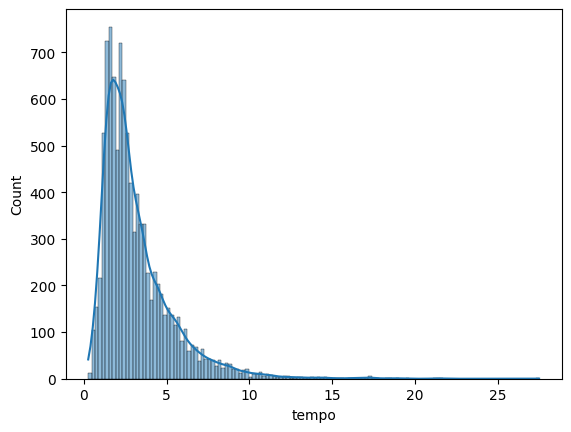

In [14]:
sns.histplot(camaras.tempo, kde=True)

Está vendo como os dados estão concentrados à esquerda? Isso é um sinal de assimetria à direita. A assimetria é justamente essa massa de dados que temos a mais de um lado da distribuição. No nosso caso, isso é esperado, pois temos muitos processos que são resolvidos rapidamente, mas alguns poucos que demoram muito tempo.

Por último, será que os tempos variam por câmara? Em tese, não deveriam, já que os casos são distribuídos aleatoriamente entre elas.


In [15]:
(
  camaras
  .groupby('camara')['tempo']
  .describe()
  .reset_index()
  .query('count >= 100')
  .sort_values('50%', ascending=False)
)

,camara,count,mean,std,min,25%,50%,75%,max
23,12ª Câmara de Direito Criminal,567.0,3.460561,2.096506,0.383299,1.941136,2.910335,4.399726,17.210130
24,13ª Câmara de Direito Criminal,624.0,3.361304,2.321851,0.418891,1.837098,2.751540,4.141684,21.108830
5,03ª Câmara de Direito Criminal,581.0,3.199803,2.263286,0.487337,1.681040,2.650240,4.128679,18.893908
15,08ª Câmara de Direito Criminal,683.0,3.255774,2.174564,0.470910,1.774127,2.639288,4.088980,18.266940
27,16ª Câmara de Direito Criminal,660.0,3.272711,2.330123,0.501027,1.704997,2.621492,4.143053,18.976044
9,05ª Câmara de Direito Criminal,464.0,3.291133,2.282669,0.323066,1.766598,2.596851,4.118412,17.078713
26,15ª Câmara de Direito Criminal,620.0,3.135109,2.063688,0.410678,1.746749,2.568104,3.739220,13.930185
3,02ª Câmara de Direito Criminal,523.0,3.167589,2.288019,0.525667,1.672827,2.472279,3.801506,21.508556
11,06ª Câmara de Direito Criminal,723.0,3.176956,2.443826,0.511978,1.618070,2.444901,3.822040,21.440110
17,09ª Câmara de Direito Criminal,610.0,3.045163,1.907837,0.495551,1.788501,2.440794,3.670089,13.478439


Os tempos medianos variam entre 2.91 (2 anos e 11 meses) e 2.28 (2 anos e 3 meses). A diferença é pequena, mas existe. Veremos, mais adiante na disciplina, se podemos considerar que essa diferença é estatisticamente significante.

## Medidas de variabilidade: conceitos

Medidas de **dispersão** ou **variabilidade** nos dão uma ideia de quão espalhados os dados estão em torno de algum ponto de referência. Essas medidas são essenciais para compreender o fenômeno estudado. Na verdade, elas são o segredo por trás do funcionamento da estatística. 

As afirmações que fazemos na estatística têm sempre um grau de incerteza atrelado, porque não temos controle sobre tudo o que pode acontecer. No entanto, nós sabemos estimar esse grau de incerteza, justamente com essas medidas de variabilidade. Elas nos dão uma noção de quanto podemos confiar em uma média ou mediana, por exemplo, para tomar decisões estratégicas em um caso.

Um exemplo simples sobre isso. Imagine que, na câmara 3, **todos** os processos durem 1 ano e 3 meses. Por conta disso, sabemos que a mediana é de 1 ano e 3 meses. Na câmara 6, no entanto, a mediana é de 1 ano e 3 meses também, mas temos muitos casos que duram 5 meses e casos que duram 10 anos. Se seu recurso caísse na 3ª câmara e seu cliente perguntasse quanto tempo o processo vai demorar, você falaria o mesmo que se caísse na 6ª câmara? 

Provavelmente **não**. Isso porque a incerteza é maior na 6ª câmara do que na 3ª. Para a 3ª câmara, provavelmente você falaria para o cliente "tudo pode acontecer no direito, mas metade dos casos duram até 1 ano e 3 meses". Já para a 6ª, talvez seria algo do tipo "é difícil precisar, mas geralmente demora entre X meses e Y anos". A variabilidade nos ajuda a entender X e Y.

Na seção anterior, já vimos um possível intervalo desse tipo quando analisamos os quartis, relacionado à amplitude a partir de quantis empírios. Vamos começar por eles.

Como antes, para cada conceito, vamos mostrar a definição, a fórmula matemática e o código em python para calcular.

### Amplitude

Como veremos, a amplitude é mais útil para reportar dados básicos sobre o fenômeno estudado do que para tomar decisões sobre o comportamento dos dados.

#### Definição

A **amplitude** é a diferença entre o maior e o menor valor da amostra. Ela é uma medida de variabilidade que nos dá uma ideia de quão espalhados em geral. 

#### Fórmula

A fórmula da amplitude é dada por:

$$A = \text{máximo} - \text{mínimo} = q(1) - q(0)$$

#### Código

A amplitude pode ser calculada em python fazendo a diferença entre o máximo, com `.max()` e o mínimo, com `.min()`, como já vimos anteriormente.

### Amplitude do Intervalo Interquartil (IQR)

#### Definição

A amplitude do **intervalo interquartil** (inter quantile range, IQR) é a diferença entre o terceiro quartil (75%) e o primeiro quartil (25%). Ele é uma medida de variabilidade que nos dá uma ideia de quão espalhados os dados estão em torno da mediana.

#### Fórmula

O IQR é dado por:

$$IQR = q(75\%) - q(25\%)$$

Como o $q(25\%)$ é o valor que separa os 25% menores valores da amostra e como o $q(75\%)$ é o valor que separa os 25% maiores valores da amostra, o IQR é a amplitude de um intervalo que contém 50% dos dados. 

Por exemplo, para um conjunto de dados [1, 2, 2, 3, 3, 4, 4, 5, 5, 7, 9, 9, 10] /com 13 observações, temos que $q(25\%) = 3$ e $q(75\%) = 7$, então o IQR é $7-3=4$.

#### Código

O IQR pode ser calculado em python usando a função `quantile` do pacote `numpy`, ou então dentro do próprio pandas, com o método `.quantile()`. Também vimos a o método `.describe()`, que acaba soltando o IQR.

In [16]:
minimo = camaras.tempo.min()
maximo = camaras.tempo.max()

amplitude = maximo - minimo

q3 = camaras.tempo.quantile(0.75)
q1 = camaras.tempo.quantile(0.25)
iqr = q3 - q1

amplitude, iqr

(27.23066392881588, 2.2258726899383983)

A amplitude dos tempos é de 27.23 anos (27 anos e 3 meses). Já o IQR dos tempos é de 2.23 anos (2 anos e 3 meses).

Note como temos, aqui, um balanço entre a incerteza a informação a ser passada. Nos nossos dados, 100% do que vimos varia em torno de 27 anos, mas isso não é muito informativo. No entanto, sabemos que 50% dos dados que vimos variam em 2 anos e 3 meses em torno da mediana. Assumimos um erro, mas é uma informação mais útil para tomada de decisão. A estatística é exatamente sobre isso: assumimos a possibilidade de errar para fazer afirmações mais úteis.

Um exemplo caricato desse pensamento é o das pesquisas eleitorais. Em pesquisas eleitorais, geralmente os institutos de pesquisa apresentam margens de erro (de 2 ou 3 pontos percentuais, para cima e para baixo). Depois, quando os resultados ficam fora dessa margem de erro, os institutos são criticados. Não seria melhor, então, para os institutos, que falassem que a intenção de votos de um candidato está entre 0% e 100%? Dessa forma, o instituto não erraria. Mas essa não é a informação que a população quer saber. O que é acertar ou errar nesse sentido?

Para finalizar o assunto do IQR e amplitude, nada nos impede de considerar outros intervalos que não os quartis. A medida também não precisa ficar em torno da mediana, se isso for de interesse. O IQR é apenas um valor clássico e bastante usado.

### Desvio padrão

#### Definição

O **desvio padrão** é uma medida de variabilidade que nos dá uma ideia de quão espalhados os dados estão em torno da média. Ele é a medida de variabilidade mais comum na estatística.

#### Fórmula

O desvio padrão é dado por:

$$s = \sqrt{\frac{1}{N}\sum_{i=1}^{N} (x_i - \bar{x})^2}$$

Onde $\bar{x}$ é a média e $x_i$ é o valor da variável quantitativa de interesse para determinado processo $i$.

A fórmula pode assustar um pouco. Por que temos uma raiz quadrada, e qual o objetivo desse valor ao quadrado? Em linhas gerais, o que queremos é medir o quanto cada valor está distante da média. Para isso, fazemos a diferença entre o valor observado e a média ($x_i - \bar{x}$). Como esses valores podem ser positivos ou negativos, elevamos essas diferenças ao quadrado, o que torna os valores sempre positivos. Aí calculamos a média desses desvios (que chamamos de **variância**). Finalmente, para retornar à escala original, aplicamos a raiz quadrada, que é a operação inversa de elevar ao quadrado.

Sugestão de leitura: [este texto aqui](https://livro.abj.org.br/03-estatisticas.html#medidas-de-dispers%C3%A3o-ao-redor-da-m%C3%A9dia-desvio-padr%C3%A3o-e-desvio-m%C3%A9dio) para maior aprofundamento.

#### Código

Para calcular o desvio padrão em python, usamos a função `std` do pacote `numpy`, ou então dentro do próprio pandas, com o método `.std()`.

In [17]:
std_pandas = camaras.tempo.std()
std_numpy = np.std(camaras.tempo)

std_pandas, std_numpy

(2.182874474194876, 2.1827653168264267)

Os números do numpy são ligeiramente diferentes do que os do pandas. Vamos testar um exemplo com menos números.

In [18]:
df = pd.DataFrame({
  'numeros': [1,3,5,6,9]
})

std_pd = df['numeros'].std()
std_np = np.std(df['numeros'])

std_pd, std_np

(3.03315017762062, 2.7129319932501073)

Com um exemplo pequeno a diferença ficou ainda maior!

Isso ocorre porque as fórmulas que o numpy e o pandas usam para calcular o desvio padrão são diferentes.

Fórmula no caso do pandas:

$$s_{\text{pandas}} = \sqrt{\frac{1}{N}\sum_{i=1}^{N} (x_i - \bar{x})^2}$$

Fórmula no caso do numpy:

$$s_{\text{numpy}} = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N} (x_i - \bar{x})^2}$$

Veja que a conta do pandas é igual à nossa conta original. Já a do numpy coloca o valor $N-1$ no denominador, ao invés de $N$. O valor $N-1$ é um ajuste que estatísticos do século XX fizeram para garantir algumas propriedades matemáticas dessa estatística, que não vamos tratar agora. Na prática, no entanto, essa diferença é muito pequena, especialmente com grandes bases de dados. Se tiver interesse em estudar sobre isso, veja Bussab & Morettin (2023).

## Medidas de variabilidade: aplicação

Vamos voltar ao nosso querido `.describe()`.

In [19]:
camaras.tempo.describe()

count    9999.000000
mean        3.178841
std         2.182874
min         0.260096
25%         1.705681
50%         2.529774
75%         3.931554
max        27.490760
Name: tempo, dtype: float64

Agora temos conhecimento suficiente para calcular tudo a partir desses resumos!

Os processos costumam demorar 2 anos e 6 meses desde o ajuizamento até o acórdão. Podemos dizer que 50% deles variam entre 1 ano e 8 meses e 3 anos e 11 meses. Já a média é de 3 anos e 2 meses, com desvio padrão 2 anos e 2 meses. Ou seja, tipicamente os tempos variam mais de 2 anos para mais ou para menos da média. É bastante variação.

Uma dúvida que pode surgir, já que isso foi citado na introdução, é: como eu associo essa variabilidade à uma medida de incerteza? Por exemplo, como podemos proceder para fazer afirmações do tipo: com 95% de certeza, os processos duram entre X e Y? Veremos isso quando falarmos de **estatística inferencial**.

Enquanto não chegamos nessa parte mais mágica da estatística, vamos ver mais algumas visualizações interessantes. Primeiro, não seria interessante analisar esses quantis que vêm do `.describe()` de forma visual?

Esse é o papel do boxplot:

<Axes: xlabel='tempo', ylabel='assunto'>

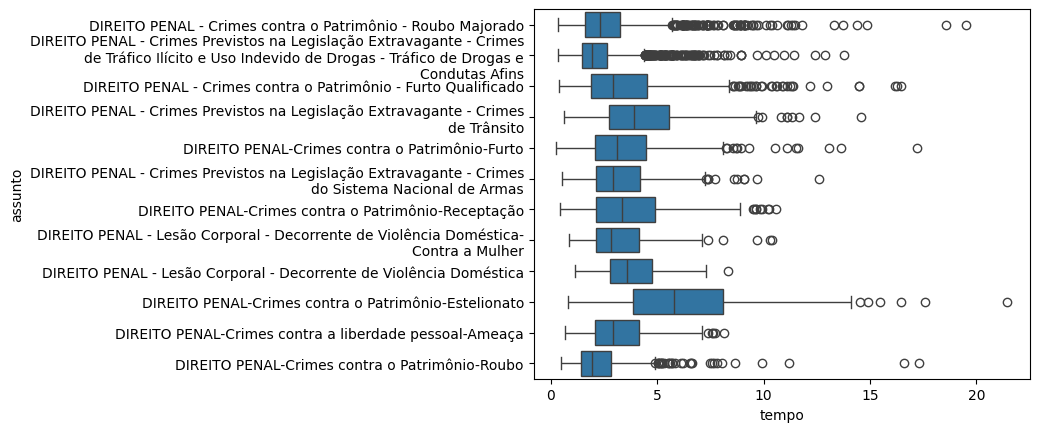

In [20]:
## Primeiro, vamos retirar da amostra os assuntos que têm menos de 100 observações
camaras_assuntos_100 = camaras.groupby('assunto').filter(lambda x: len(x) >= 100)

camaras_assuntos_100['assunto'] = [
  textwrap.fill(a, 70) for a in camaras_assuntos_100['assunto']
]

# agora, vamos fazer o boxplot
sns.boxplot(data=camaras_assuntos_100, y='assunto', x='tempo')

Nesse gráfico, a linha central é a mediana. Os valores limites da 'caixa' são, respectivamente, os quartis 1 e 3. Ou seja, a amplitude da caixa é exatamente o IQR. As linhas contínuas que vêm em seguida são chamadas de *bigodes*, e são calculadas por 1,5 vezes o IQR (o motivo disso não vem ao caso agora). Valores que estão fora dos bigodes, nas bolinhas, são considerados valores atípicos para esse tipo de processo. 

Muita informação em um gráfico apenas! Geralmente usamos esses gráficos para rapidamente entender um pouco mais sobre nossos dados. Por exemplo, é possível ver que tráfico de drogas não só tem uma mediana menor mas também varia pouco. Já estelionato varia bastante, inclusive com alguns casos durando mais de 15 anos. E muito mais para investigar.

### Cuidado com algumas análises de tempo (avançado)

Um cuidado a ser tomado em estudos relacionados a tempo de processos judiciais é com relação ao escopo da pesquisa.

No caso da pesquisa das câmaras, a origem dos dados é a consulta de jurisprudência. Isso significa que temos em nossa amostra apenas casos que tiveram acórdãos proferidos. Existem muitos casos criminais tramitando na segunda instância do TJSP que não estão em nossa base simplesmente porque não foram decididos ainda. Chamamos esse tipo de pesquisa de **retrospectiva**.

Isso significa que a nossa análise de tempos pode ter um problema: será que os casos que ainda não foram julgados são mais demorados do que os casos que temos em nossa amostra? Pode ser que sim, mas também pode ser que não. 

A única forma de verificar se existe um viés é coletando dados de processos a partir da sua data de ajuizamento, utilizando ferramentas como Diários de Justiça ou o DataJud. Esse tipo de pesquisa é chamada de **prospectiva**.

A imagem abaixo mostra exemplos de processos que ficam dentro de estudos prospectivos ou retrospectivos.

![](https://livro.abj.org.br/assets/img/tempos.png)

1. Prospectivo e retrospectivo
2. Apenas prospectivo
3. Apenas retrospectivo
4. Nenhum dos dois, mas poderia ser capturado por atividade no período
5. fora do escopo
6. fora do escopo
7. Nenhum dos dois tipos e não poderia ser capturado (ficou inativo no período)

Esse assunto é complexo e poucas pessoas dominam. Até mesmo o CNJ comete alguns erros nesse sentido. O importante que devemos ter em mente são três coisas:

1. Quando analisamos tempos em estudos retrospectivos, precisamos ter em mente que estamos estimando o tempo dos processos em toda a história do TJSP e não só dos últimos anos, já que nossa amostra inclui casos muito antigos.
2. Quando analisamos tempos em estudos prospectivos, precisamos tomar certos cuidados para realizar estimativas. Não veremos isso aqui, mas se tiver interesse, a técnica a ser aplicada aqui é a **análise de sobrevivência**.
3. **NUNCA** faça análises de aceleração dos processos (verificar se os processos estão ficando mais rápidos) em estudos retrospectivos.

Sobre (3), é possível verificar visualmente o motivo disso ser um problema grave. A figura abaixo mostra, no eixo x, o ano de ajuizamento dos processos e, no eixo y, o tempo dos processos até o acórdão.

<Axes: xlabel='ano_ajuizamento', ylabel='tempo'>

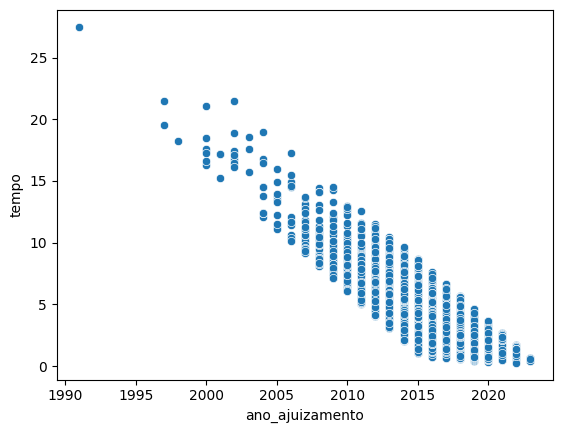

In [21]:

camaras['ano_ajuizamento'] = [int(p[9:13]) for p in camaras.processo]

sns.scatterplot(camaras, x = 'ano_ajuizamento', y = 'tempo')


O que está acontecendo aqui? Os processos estão ficando mais rápidos?

Na verdade não.

O que está acontecendo é que não conseguimos ver processos fora da faixa de pontos por conta da forma que os dados foram coletados!

Os dados foram coletados a partir de acórdãos publicados entre 2016 e 2023. Ou seja, não existe possibilidade, por exemplo, de encontrar casos ajuizados em 2020 que tenham tempo maior do que 4 anos. Um caso assim seria julgado em 2024 e, portanto, estaria fora do nosso escopo de busca. O mesmo ocorre para os casos muito rápidos: não temos, em nossa amostra, casos que foram ajuizados em 2005 e que duraram menos de 10 anos, já que essas decisões foram publicadas no máximo em 2015 e, portanto, também estão fora do escopo de busca. 

Ou seja, esse gráfico **não informa absolutamente nada** a respeito da potencial aceleração dos tempos dos processos. Ele simplesmente evidencia o escopo da pesquisa.